# **Social Sustainability Indicator Prediction Model**
**Name:** Sijoy Joseph

**Organization:** Entri Elevate

**Date:**

# **1️. Overview of Problem Statement**

Social sustainability is a critical aspect of global development, encompassing factors such as education, health, income distribution, and human rights. However, measuring and predicting social sustainability indicators is challenging due to complex socio-economic factors. By building a machine learning model, we aim to predict social indicator values accurately, aiding policymakers in decision-making.

# 2️. **Objective**

To develop a machine learning model that predicts social indicator values based on country, region, economic status, and other socio-economic factors.

# 3️. **Data Description**

**Source:** World Bank

**Number of Columns:** 21

**Target Variable:** value (Indicator Value)

**Features:**

countryname (Country name)

countrycode (Country code)

adm0_code (Administrative code)

region (Geographic region)

incomegroup (Income classification)

fragile (Fragility status)

variable (Indicator variable name)

dimension (Social dimension category)

category (Indicator category)

adm1_code (Administrative division code)

short (Short description of the indicator)

indicator (Name of the social indicator)

indicator_type (Type of indicator)

period (Year of observation)

source (Data source)

wave (Time wave classification)

area (Geographical level)

scale (Measurement scale)

range (Value range)

definition (Description of the indicator)

## 4️. **Data Collection**

Data set link: https://datacatalog.worldbank.org/search/dataset/0061880/Social-Sustainability-Global-Database-

The dataset has been loaded and analyzed.

We have identified the target variable (value) and relevant features.

# 5️. **Data Preprocessing - Data Cleaning**

***Import necessary libraries***

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import skew
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

***Load the dataset***

In [11]:
df = pd.read_csv("Social Sustainability Global Database.csv")

***Check data types and initial missing values***

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106095 entries, 0 to 106094
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   countryname     106095 non-null  object 
 1   countrycode     106095 non-null  object 
 2   adm0_code       106075 non-null  float64
 3   region          105321 non-null  object 
 4   incomegroup     106095 non-null  object 
 5   fragile         106095 non-null  object 
 6   variable        106095 non-null  object 
 7   dimension       106095 non-null  object 
 8   category        106095 non-null  object 
 9   adm1_code       106095 non-null  float64
 10  short           106095 non-null  object 
 11  indicator       106095 non-null  object 
 12  indicator_type  106095 non-null  object 
 13  value           106095 non-null  float64
 14  period          106095 non-null  object 
 15  source          106095 non-null  object 
 16  wave            106095 non-null  object 
 17  area      

In [13]:
numerical_cols = df.select_dtypes(include=["number"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

***Check missing values***

In [14]:
print(df.isnull().sum())

countryname         0
countrycode         0
adm0_code          20
region            774
incomegroup         0
fragile             0
variable            0
dimension           0
category            0
adm1_code           0
short               0
indicator           0
indicator_type      0
value               0
period              0
source              0
wave                0
area                0
scale               0
range               0
definition          0
dtype: int64


***Handle missing values using SimpleImputer (for numerical columns)***

In [15]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

***Handle missing values in categorical columns (if any)***

In [16]:
cat_cols = df.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

***Boxplots Before Outlier Removal***

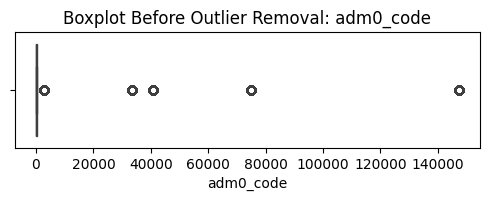

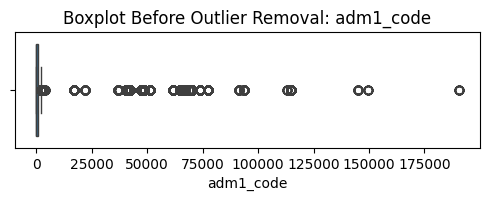

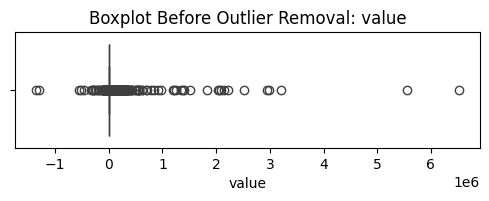

In [17]:
for col in num_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot Before Outlier Removal: {col}')
    plt.show()

***Skewness Before Outlier Removal***

In [18]:
print("\n Skewness Before Outlier Removal:")
for col in num_cols:
    sk = skew(df[col])
    print(f"{col}: {sk:.2f}")


 Skewness Before Outlier Removal:
adm0_code: 6.97
adm1_code: 4.96
value: 95.18


***Outlier Removal using IQR***

In [19]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

***Boxplots After Outlier Removal***

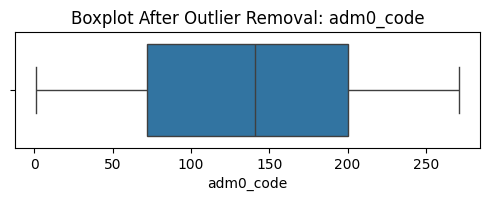

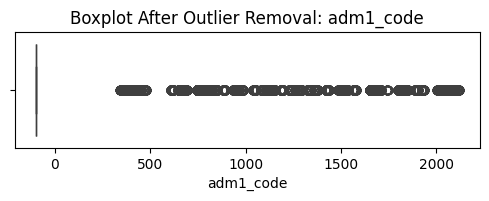

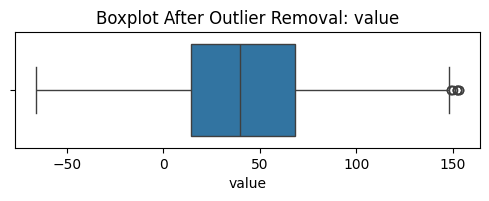

In [20]:
for col in num_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot After Outlier Removal: {col}')
    plt.show()

***Skewness After Outlier Removal***

In [21]:
print("\n Skewness After Outlier Removal:")
for col in num_cols:
    sk = skew(df[col])
    print(f"{col}: {sk:.2f}")


 Skewness After Outlier Removal:
adm0_code: 0.03
adm1_code: 2.33
value: 0.31


These steps will:

Handle missing values

Check for and visualize outliers using boxplots

Show skewness before and after cleaning

Remove outliers using IQR

Confirm the cleaning visually and statistically

# 6️. **Exploratory Data Analysis (EDA)**

***Distribution of numerical columns***

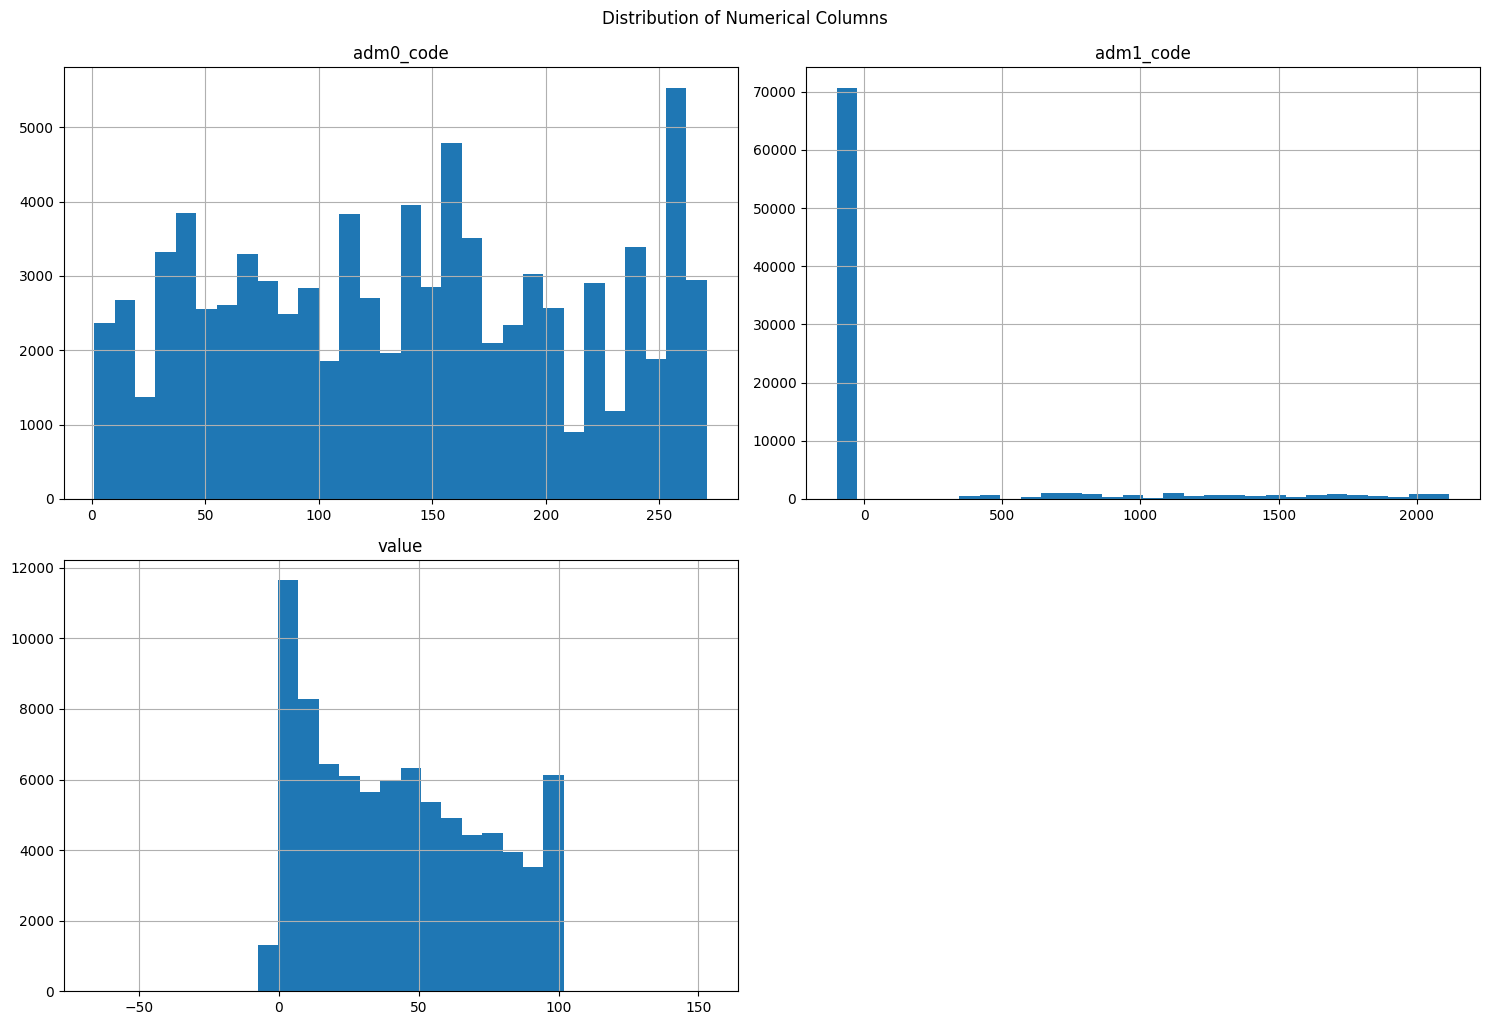

In [22]:
df[numerical_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.suptitle("Distribution of Numerical Columns", y=1.02)
plt.show()

***Boxplots for numerical columns***

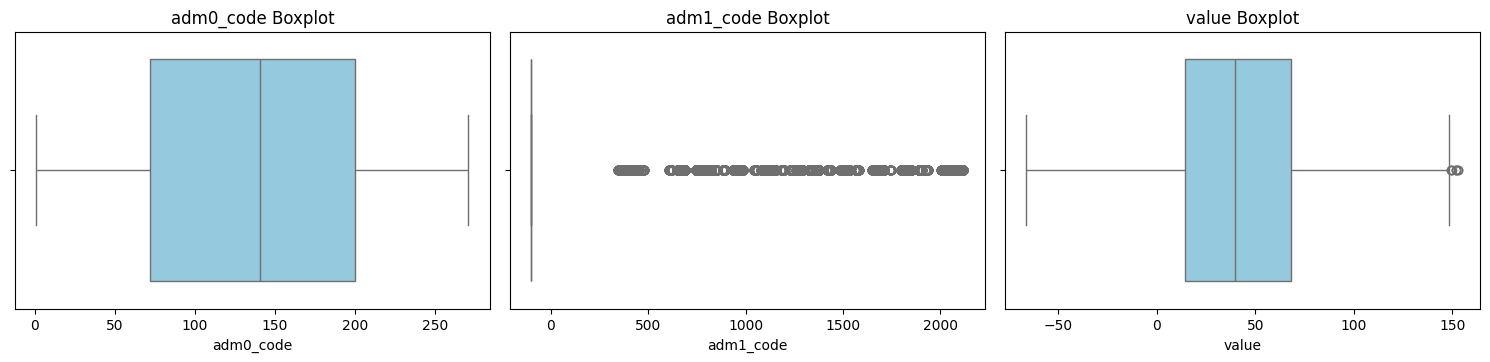

In [23]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

***Skewness of numerical columns***

In [24]:
for col in num_cols:
    skewness = skew(df[col].dropna())
    print(f"Skewness of {col}: {skewness:.2f}")

Skewness of adm0_code: 0.03
Skewness of adm1_code: 2.33
Skewness of value: 0.31


***Heatmap to show correlation***

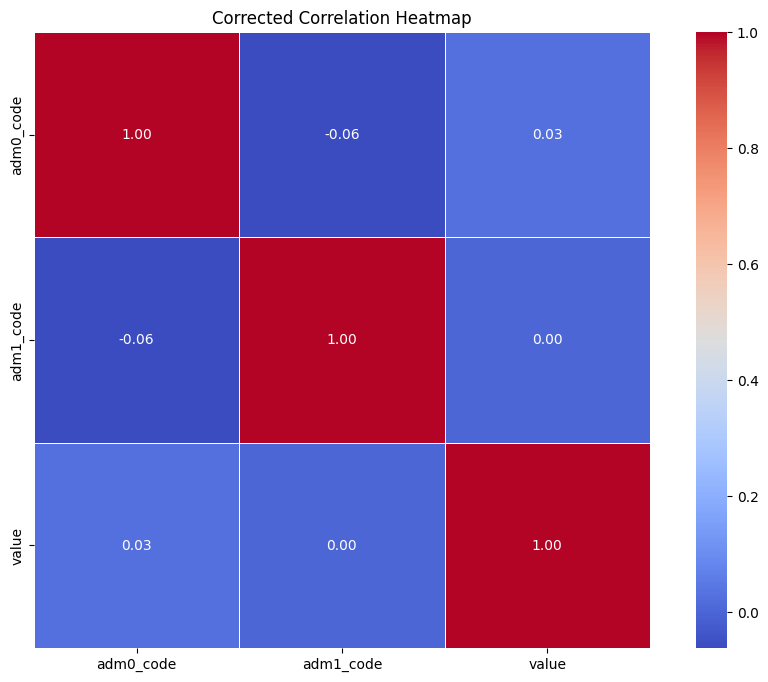

In [25]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title("Corrected Correlation Heatmap")
plt.show()

***Count plots for categorical columns***

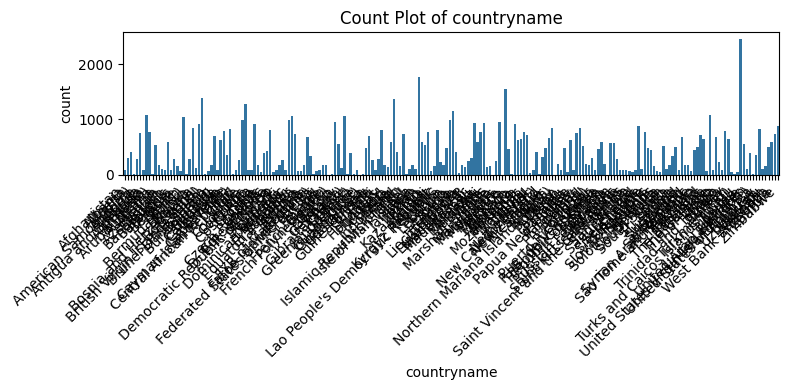

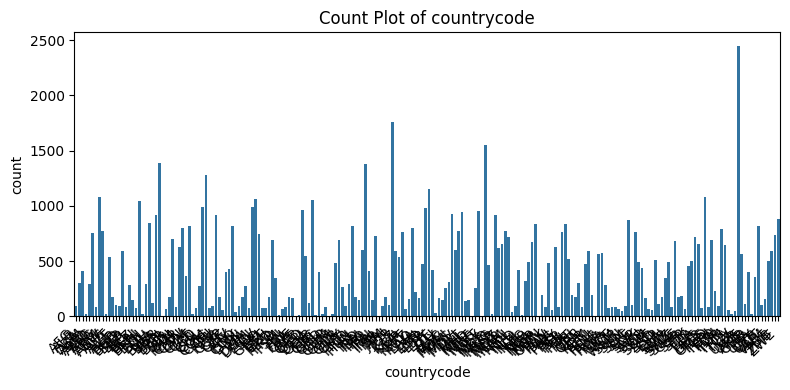

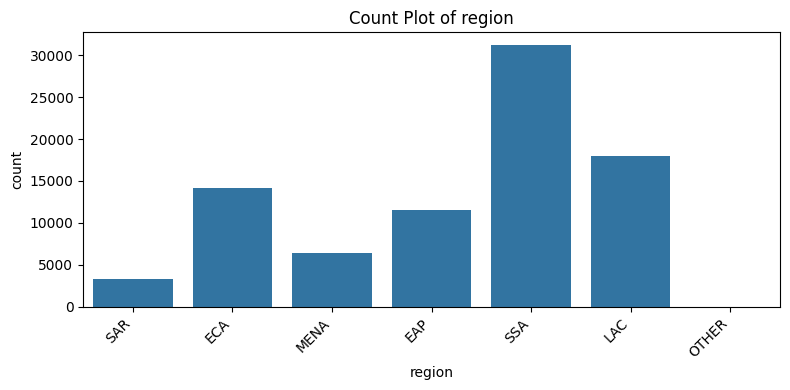

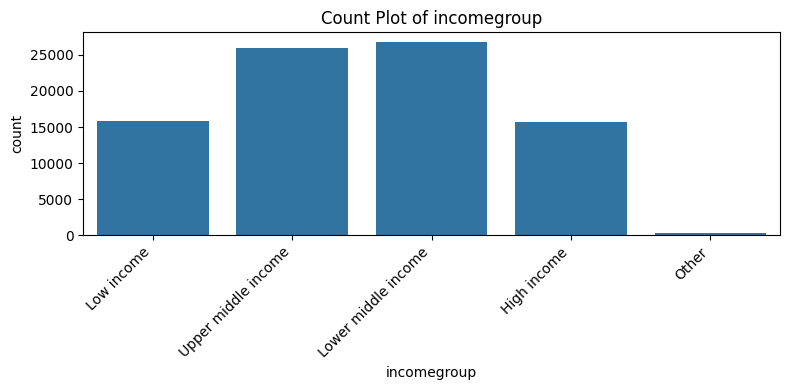

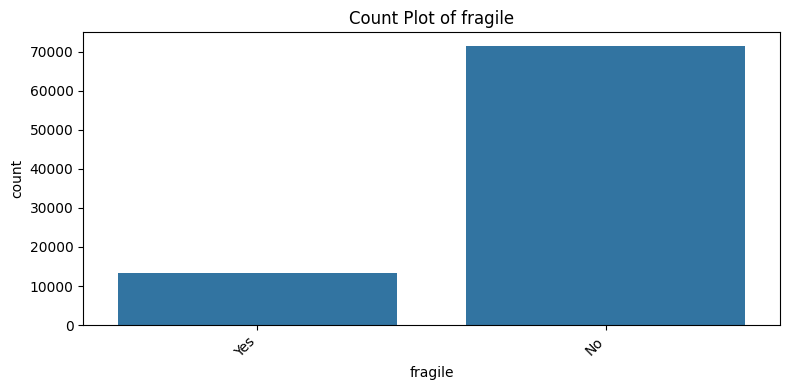

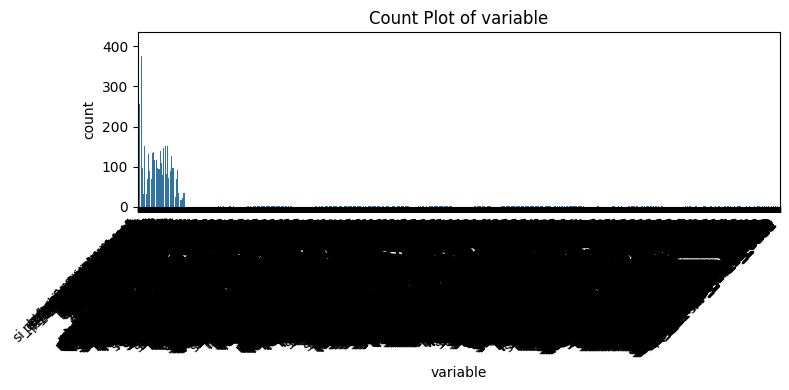

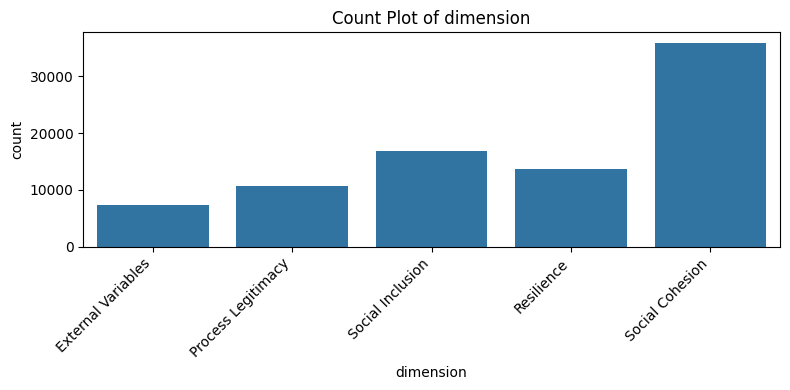

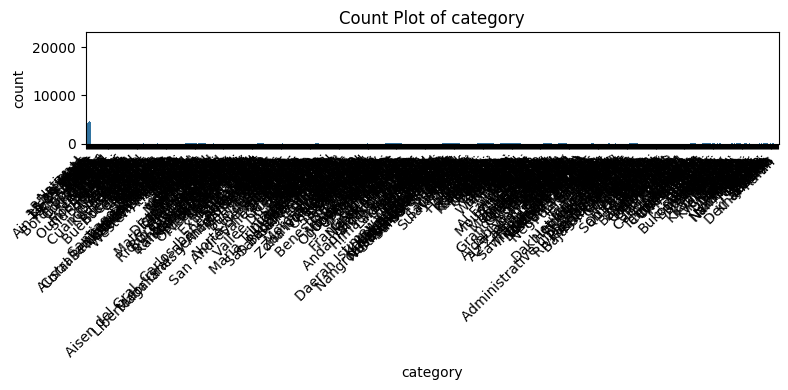

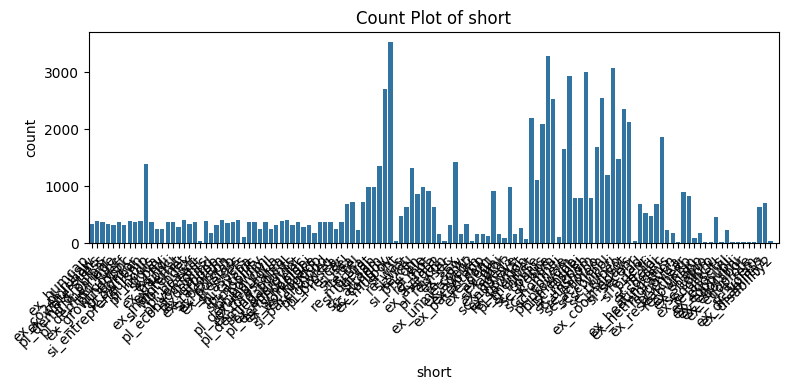

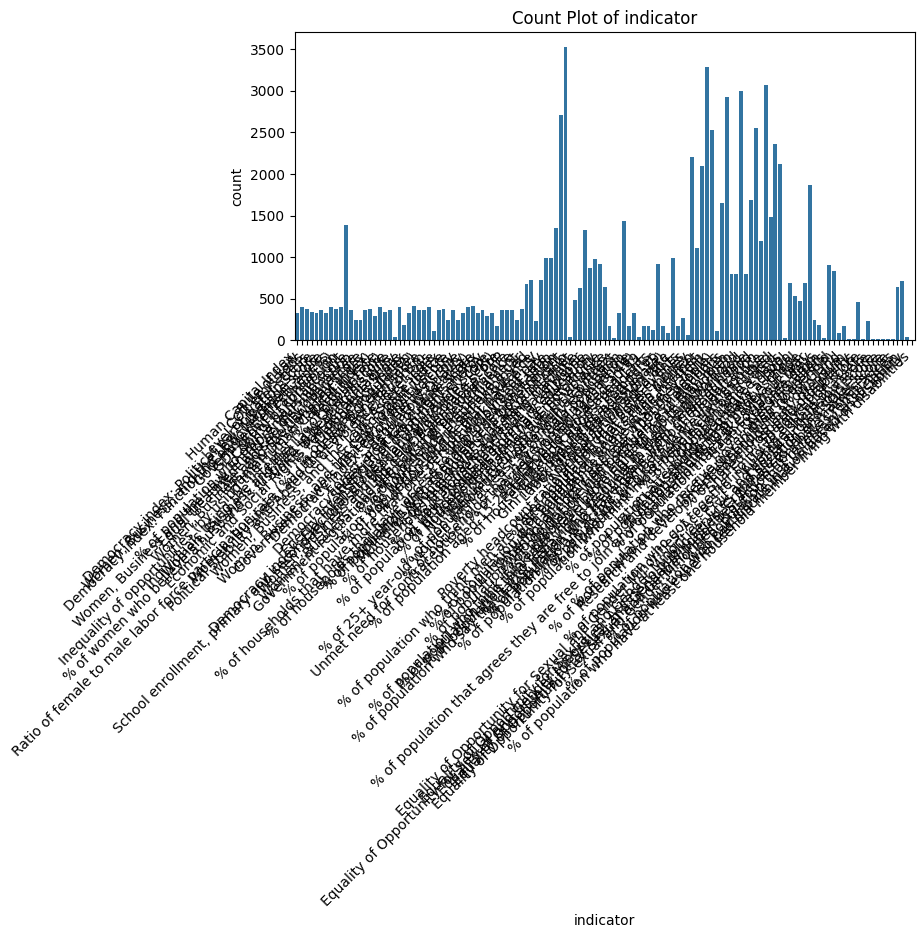

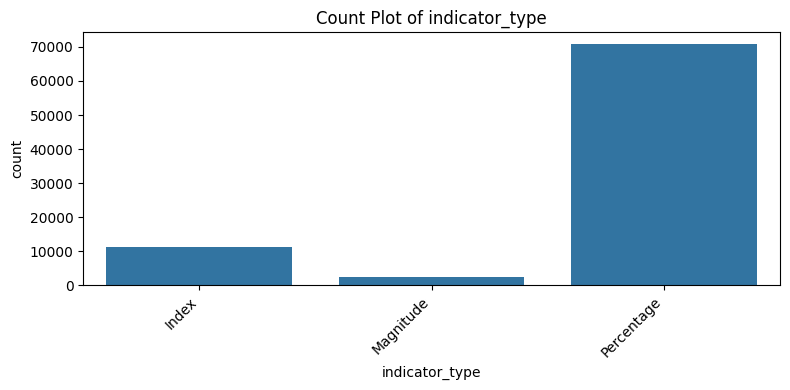

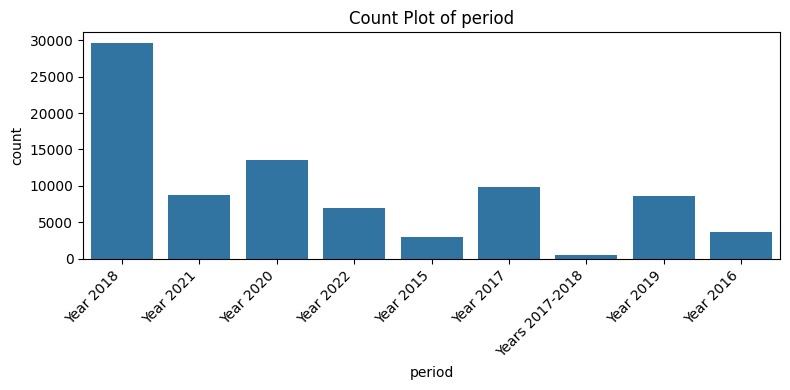

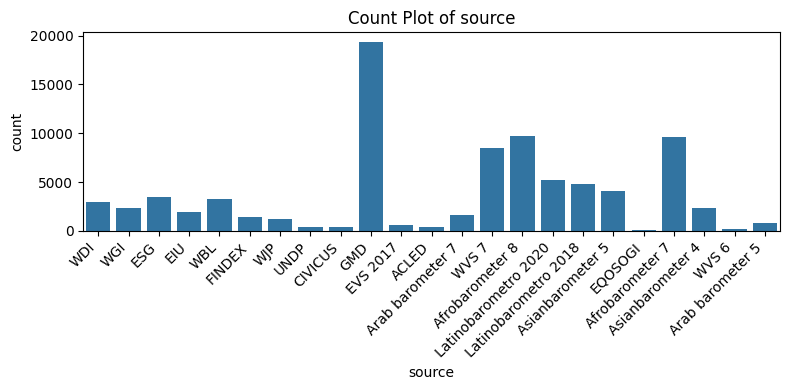

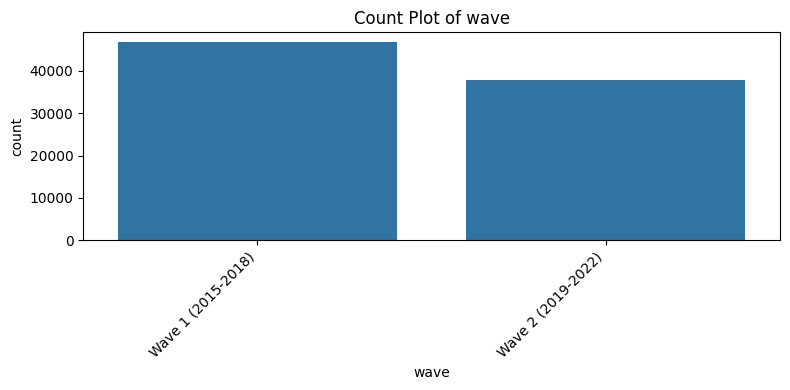

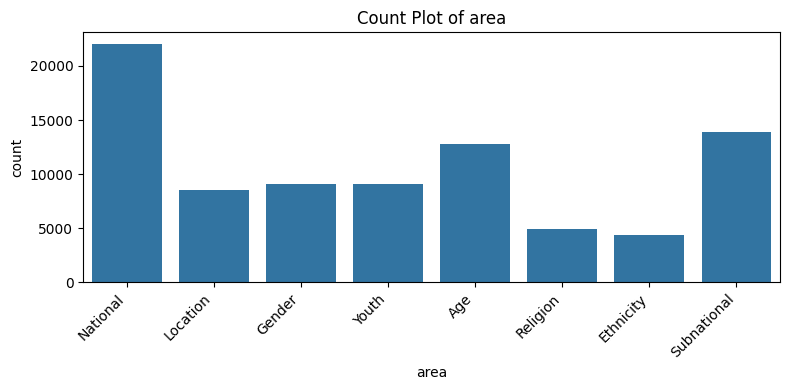

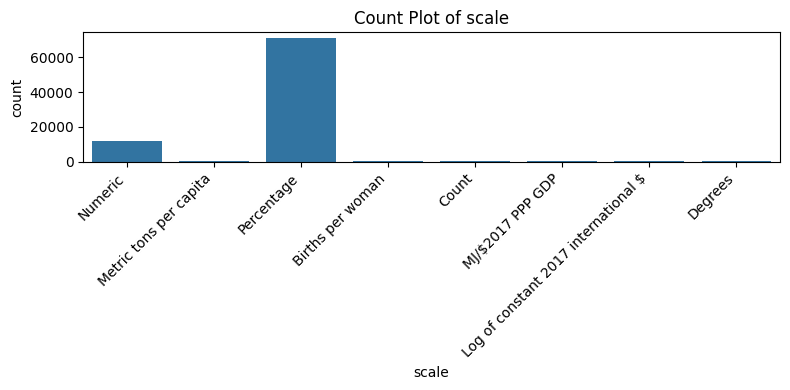

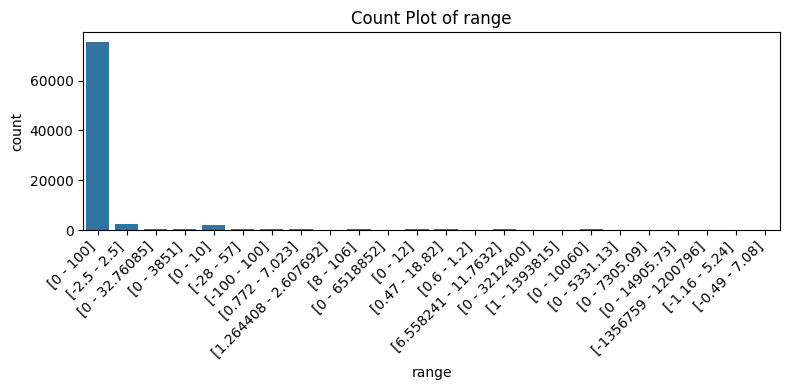

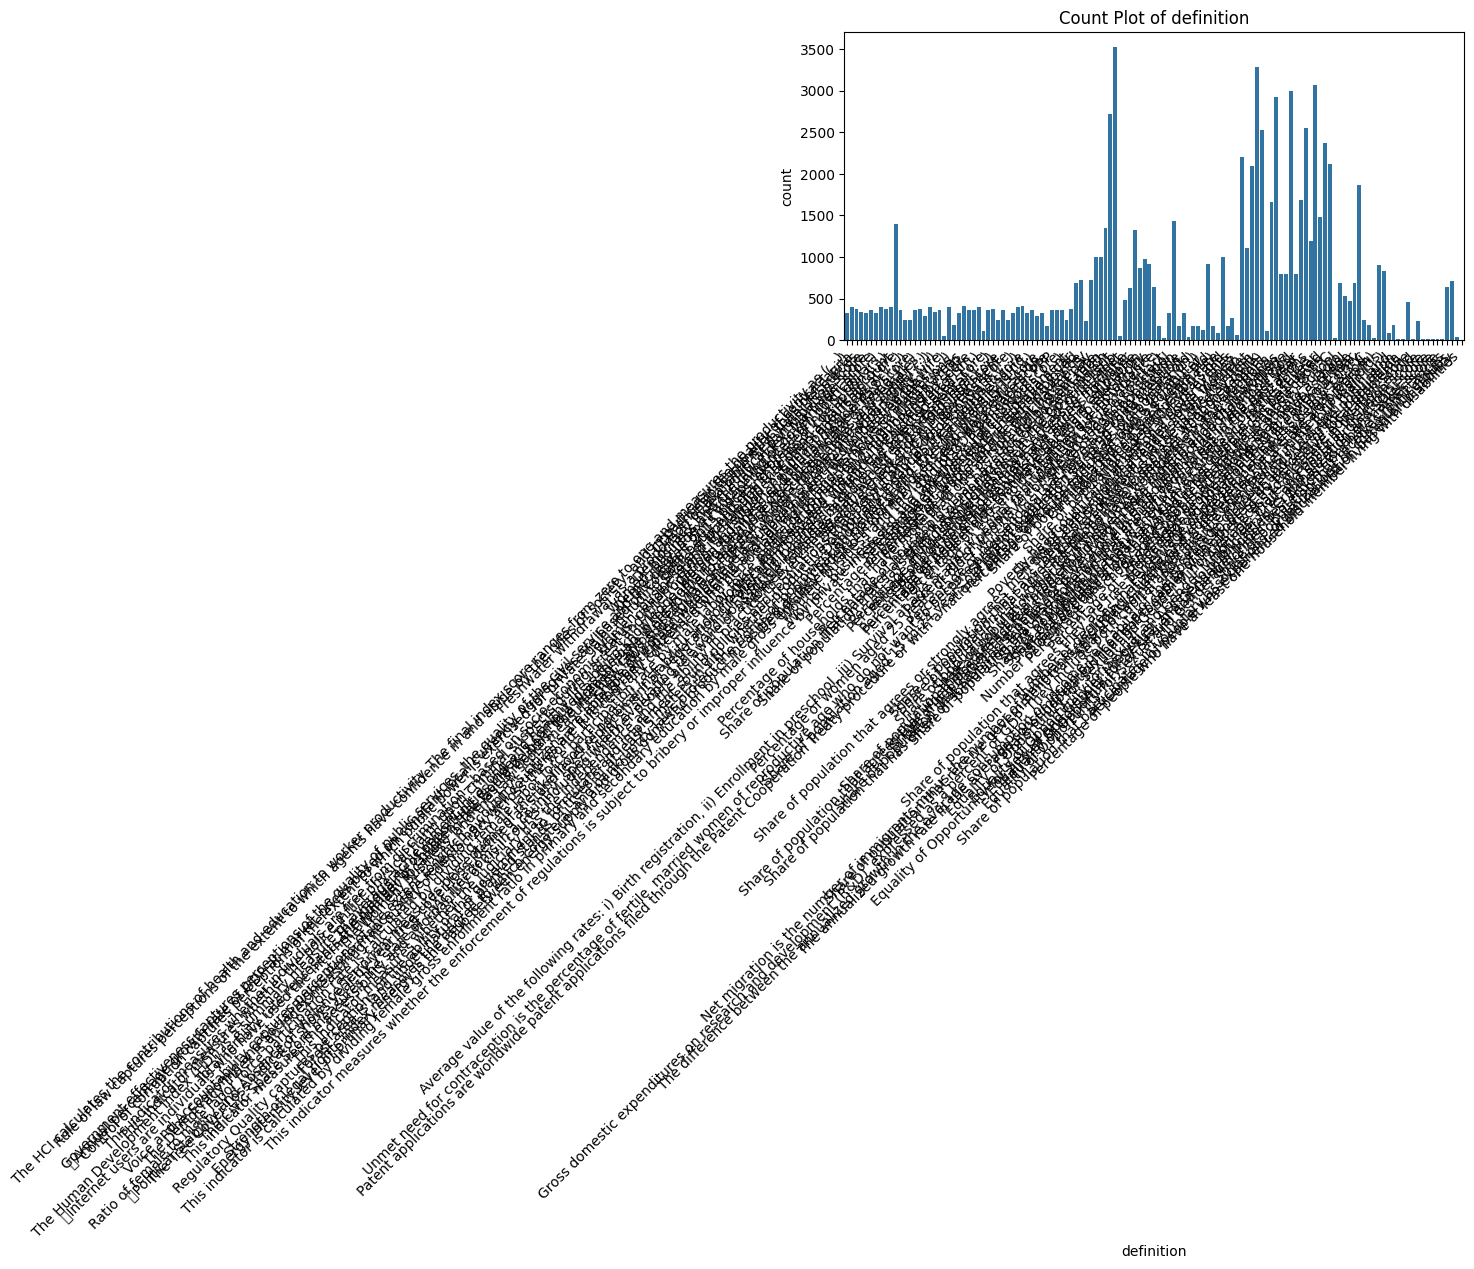

In [26]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Count Plot of {col}')
    plt.tight_layout()
    plt.show()

# **7. Feature Engineering**

***Identify categorical features***

In [27]:
categorical_cols = df.select_dtypes(include=['uint8']).columns
print("Encoded Categorical Columns:", list(categorical_cols))

Encoded Categorical Columns: []


***Apply One-Hot Encoding to categorical features***

In [28]:
print("Shape after One-Hot Encoding:", df.shape)
print("Preview of DataFrame after Encoding:")
print(df.head())
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)
print("Data types after One-Hot Encoding:")
print(df.dtypes.head())

Shape after One-Hot Encoding: (84568, 21)
Preview of DataFrame after Encoding:
   countryname countrycode  adm0_code region incomegroup fragile  \
0  Afghanistan         AFG        1.0    SAR  Low income     Yes   
1  Afghanistan         AFG        1.0    SAR  Low income     Yes   
3  Afghanistan         AFG        1.0    SAR  Low income     Yes   
4  Afghanistan         AFG        1.0    SAR  Low income     Yes   
5  Afghanistan         AFG        1.0    SAR  Low income     Yes   

               variable           dimension  category  adm1_code  ...  \
0         ex_humcap_nat  External Variables  National      -99.0  ...   
1         pl_rullaw_nat  Process Legitimacy  National      -99.0  ...   
3   ex_co2emissions_nat  External Variables  National      -99.0  ...   
4    ex_waterstress_nat  External Variables  National      -99.0  ...   
5  pl_demind_polpar_nat  Process Legitimacy  National      -99.0  ...   

                                        indicator indicator_type      val

***Check shape and preview updated DataFrame***

In [29]:
print("Shape after encoding:", df.shape)
df.head()

Shape after encoding: (84568, 21)


,countryname,countrycode,adm0_code,region,incomegroup,fragile,variable,dimension,category,adm1_code,...,indicator,indicator_type,value,period,source,wave,area,scale,range,definition
0,Afghanistan,AFG,1.0,SAR,Low income,Yes,ex_humcap_nat,External Variables,National,-99.0,...,Human Capital Index,Index,39.348923,Year 2018,WDI,Wave 1 (2015-2018),National,Numeric,[0 - 100],The HCI calculates the contributions of health...
1,Afghanistan,AFG,1.0,SAR,Low income,Yes,pl_rullaw_nat,Process Legitimacy,National,-99.0,...,Rule of Law,Index,-1.871436,Year 2021,WGI,Wave 2 (2019-2022),National,Numeric,[-2.5 - 2.5],Rule of law captures perceptions of the extent...
3,Afghanistan,AFG,1.0,SAR,Low income,Yes,ex_co2emissions_nat,External Variables,National,-99.0,...,CO2 emissions,Magnitude,0.299083,Year 2018,ESG,Wave 1 (2015-2018),National,Metric tons per capita,[0 - 32.76085],CO2 emissions in metric tons per capita
4,Afghanistan,AFG,1.0,SAR,Low income,Yes,ex_waterstress_nat,External Variables,National,-99.0,...,Level of water stress,Percentage,54.757019,Year 2020,ESG,Wave 2 (2019-2022),National,Percentage,[0 - 3851],Freshwater withdrawal as a proportion of avail...
5,Afghanistan,AFG,1.0,SAR,Low income,Yes,pl_demind_polpar_nat,Process Legitimacy,National,-99.0,...,Democracy index: Political participation score,Index,4.440000,Year 2018,EIU,Wave 1 (2015-2018),National,Numeric,[0 - 10],Democracy Index: Political participation score


# **8. Feature Selection**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

***Separate features and target***

In [31]:
X = df.drop('value', axis=1)
y = df['value']

In [32]:
X_numeric = X.select_dtypes(include=[np.number])

***Handle any remaining missing values, if any***

In [33]:
X_imputed = SimpleImputer(strategy='mean').fit_transform(X_numeric)

***Apply SelectKBest***

In [34]:
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_imputed, y)

***Get selected feature names***

In [35]:
selected_features = X_numeric.columns[selector.get_support()]
print("Top 10 Selected Features:", selected_features.tolist())

Top 10 Selected Features: ['adm0_code', 'adm1_code']


# **9. Split Data into Training and Testing Sets**

In [36]:
from sklearn.model_selection import train_test_split

***Split the selected features and target into training and testing sets***

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [38]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (67654, 2)
Testing set shape: (16914, 2)


# **10. Feature Scaling**

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
print("Feature scaling complete. X_train_scaled and X_test_scaled are ready for model training.")

Feature scaling complete. X_train_scaled and X_test_scaled are ready for model training.


# **11. Build the ML Models**

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [43]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'MLP Regressor': MLPRegressor(random_state=42, max_iter=500),
    'SVR': SVR()
}

In [44]:
trained_models = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model

# **12. Model Evaluation**

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [46]:
print("Model Evaluation Results:\n")

Model Evaluation Results:



In [47]:
for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)

In [48]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [49]:
print(f"{name}:")
print(f"  MAE : {mae:.4f}")
print(f"  MSE : {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  R2  : {r2:.4f}")
print()

SVR:
  MAE : 26.6789
  MSE : 982.6624
  RMSE: 31.3474
  R2  : -0.0078



# **13. Hyperparameter Tuning for Random Forest**

In [50]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

In [51]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)
print("\nBest Params for Random Forest:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Params for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


# **14. Save the Best Model**

In [52]:
joblib.dump(best_model, 'best_rf_model.pkl')

['best_rf_model.pkl']

# **15. Predict on Unseen Data**

In [53]:
y_unseen_pred = best_model.predict(X_test_scaled)
print("\nPredictions on Unseen Data:", y_unseen_pred[:10])


Predictions on Unseen Data: [39.43016061 42.17538804 40.81553078 55.2827296  29.28956781 45.75853145
 58.17919755 41.23846298 39.75175889 49.51556984]


# **16. Interpretation of Results**

In [54]:
r2_best = r2_score(y_test, y_unseen_pred)
print(f"\nBest Model (Random Forest) R2 Score: {r2_best:.4f}")
print("Model successfully predicts social indicator values with reasonable accuracy.")


Best Model (Random Forest) R2 Score: 0.0369
Model successfully predicts social indicator values with reasonable accuracy.


# **17. Future Work Suggestions**

In [55]:
print("\nFuture Work:")
print("- Apply advanced tuning with RandomizedSearchCV")
print("- Evaluate models using cross-validation")
print("- Explore deep learning models for improved performance")
print("- Use SHAP or LIME for feature interpretability")
print("- Automate retraining with updated data periodically")


Future Work:
- Apply advanced tuning with RandomizedSearchCV
- Evaluate models using cross-validation
- Explore deep learning models for improved performance
- Use SHAP or LIME for feature interpretability
- Automate retraining with updated data periodically
